In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from google.colab import files

In [2]:
uploaded = files.upload()

Saving glass.data to glass.data


In [3]:
# Загружаем данные

col_names = ['Refractive_index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'class']
data = pd.read_csv("glass.data", delimiter=',', index_col=0)

data.columns = col_names
data.mode(numeric_only=False)

X = data.drop('class', axis=1)
Y = data['class'].astype(str)

data.bfill(inplace=True)
data.head(5)

,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
1,,,,,,,,,,
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [4]:
data.describe()

,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
# Разделяем данные на тренировочную и тестовую выборку
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

print('X - {}\nY - {}'.format(X_train.shape, Y_train.shape))

X - (170, 9)
Y - (170,)


In [6]:
# Функция для подсчета метрики для модели
def get_auc_lr_valid(X, y, C=1.0, seed=17):

  lr = LogisticRegression(C=C, random_state=seed, n_jobs=-1).fit(X, y)
  y_pred = lr.predict_proba(X)
  score = roc_auc_score(y, y_pred, multi_class='ovr')

  return score

In [7]:
%%time
score = get_auc_lr_valid(X_train, Y_train)
print(score)

0.8771467336940666
CPU times: user 80 ms, sys: 62.5 ms, total: 143 ms
Wall time: 3.23 s


In [8]:
# Создаем новые признаки

data['Mg / K'] = data.apply(lambda x: x['Mg'] / x['K'], axis=1)

if (data.isnull().values.any()):
  data = data.ffill()

data.head()

<ipython-input-8-2dfbdfe16648>:3: RuntimeWarning: divide by zero encountered in scalar divide
  data['Mg / K'] = data.apply(lambda x: x['Mg'] / x['K'], axis=1)
<ipython-input-8-2dfbdfe16648>:3: RuntimeWarning: invalid value encountered in scalar divide
  data['Mg / K'] = data.apply(lambda x: x['Mg'] / x['K'], axis=1)


,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,class,Mg / K
1,,,,,,,,,,,
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1,7.500000
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1,9.102564
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1,6.473684
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1,6.581818
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1,5.640625


In [9]:
data['Si / Na'] = data.apply(lambda x: x['Si'] / x['Na'], axis=1)
if (data.isnull().values.any()):
  data = data.ffill()

data.head()

,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,class,Mg / K,Si / Na
1,,,,,,,,,,,,
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1,7.500000,5.236141
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1,9.102564,5.394678
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1,6.473684,5.496593
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1,6.581818,5.507159
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1,5.640625,5.705238


In [10]:
%%time

data = data.replace([np.inf, -np.inf], np.nan).bfill()
X = data.drop('class', axis=1)

Y = data['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)
score = get_auc_lr_valid(X_train, Y_train)
print(score)

0.8708606469218764
CPU times: user 32.8 ms, sys: 1.22 ms, total: 34.1 ms
Wall time: 915 ms


In [11]:
# Стандартизируем новые признаки и обучим модель еще раз
new_features = pd.DataFrame(index = data.index)

new_features['Mg / K'] = data['Mg / K']
new_features['Si / Na'] = data['Si / Na']

new_features_transformed = StandardScaler().fit_transform(new_features)
nf_matrix = csr_matrix(new_features_transformed)

X_train = csr_matrix(X_train)
X_train = csr_matrix(hstack([X_train, nf_matrix[:X_train.shape[0]]]))

score = get_auc_lr_valid(X_train, Y_train)
print(score)

# Зафиксируем качество с параметрами по умолчанию
score_C_1 = get_auc_lr_valid(X_train, Y_train)
print(score_C_1)

0.8800056132134029
0.8800056132134029


In [12]:
%%time
# Набор возможных значений C
Cs = np.logspace(-3, 1, 10)

scores = []

for C in Cs:
  sc = get_auc_lr_valid(X_train, Y_train, C)
  scores.append(sc)
  print(C, ' -> ', sc)

0.001  ->  0.8022947635153571
0.0027825594022071257  ->  0.8018199028231155
0.007742636826811269  ->  0.8215922029375569
0.021544346900318832  ->  0.8392736836417264
0.05994842503189409  ->  0.8552902985033445
0.1668100537200059  ->  0.8718790777695841
0.46415888336127775  ->  0.8782155152400133
1.2915496650148828  ->  0.8805252032258087
3.593813663804626  ->  0.8840605057791385
10.0  ->  0.8810952801429552
CPU times: user 123 ms, sys: 7.45 ms, total: 130 ms
Wall time: 583 ms


In [13]:
np.max(scores)

0.8840605057791385

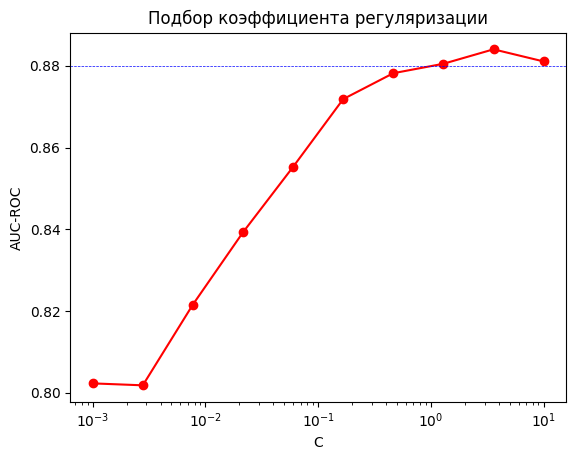

In [14]:
plt.plot(Cs, scores, 'ro-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('AUC-ROC')
plt.title('Подбор коэффициента регуляризации')

# Горизонтальная линия - качество модели с коэффициентом по умолчанию
plt.axhline(y=score_C_1, linewidth=.5, color = 'b', linestyle='dashed')
plt.show()

In [15]:
score_result = get_auc_lr_valid(X_train, Y_train, C=0.0077426)
print(score_result)

0.8214954519237144
